In [2]:
# ## Background

# What good is data without a good plot to tell the story?

# So, let's take what you've learned about Python Matplotlib and apply it to some real-world situations. For this assignment, you'll need to complete **1 of 2** Data Challenges. As always, it's your choice which you complete. _Perhaps_, choose the one most relevant to your future career.

# ## Option 1: Pyber

# ![Ride](Images/Ride.png)

# The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

# You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

# In addition, you will be expected to produce the following three pie charts:

# * % of Total Fares by City Type
# * % of Total Rides by City Type
# * % of Total Drivers by City Type

# As final considerations:

# * You must use the Pandas Library and the Jupyter Notebook.
# * You must use the Matplotlib library.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# * Remember when making your plots to consider aesthetics!
#   * You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
# * See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [8]:
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [9]:
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [24]:
ride_city_data = pd.merge(ride_data_to_load, city_data_to_load, how = "left", on = "city")
ride_city_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [44]:
#Gathers information for each city type
urban = ride_city_data.loc[ride_city_data["type"]=="Urban"]
rural = ride_city_data.loc[ride_city_data["type"]=="Rural"]
suburban = ride_city_data.loc[ride_city_data["type"]== "Suburban"]

#making x and y for plot points
urbanx = urban.groupby("city").count()["fare"]
urbany = urban.groupby("city").mean()["fare"]

ruralx = rural.groupby("city").count()["fare"]
ruraly = rural.groupby("city").mean()["fare"]

suburbanx = suburban.groupby("city").count()["fare"]
suburbany = suburban.groupby("city").mean()["fare"]


In [55]:
#finding min and max for x and y limits
x_list = [urbanx,ruralx,suburbanx]
y_list = [urbany,ruraly,suburbany]

#xmax
xmax = 0

for types in x_list:
    for x in types:
        if x > xmax:
            xmax = x
#xmin
xmin = xmax

for types in x_list:
    for x in types:
        if x < xmin:
            xmin = x
#ymax
ymax = 0

for types in y_list:
    for y in types:
        if y > ymax:
            ymax = y

#ymin
ymin = ymax

for types in y_list:
    for y in types:
        if y < ymin:
            ymin = y


20.093157894736848

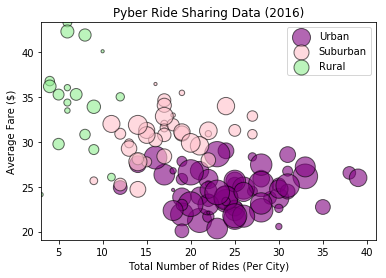

In [134]:
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#            s=x_axis, alpha=0.75)
plt.xlim(xmin,xmax+2);
plt.ylim(ymin-1,ymax);
urb = np.arange(10,650,30);  
sub = np.arange(10,450,10);
rur = np.arange(1,50,5);

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



plt.scatter(urbanx, urbany, marker="o", facecolors="purple", edgecolors="black",
            s=urb, alpha=0.60, label = "Urban");
plt.scatter(suburbanx, suburbany, marker="o", facecolors="pink", edgecolors="black",
            s=sub, alpha=0.60, label = "Suburban");
plt.scatter(ruralx, ruraly, marker="o", facecolors="lightgreen", edgecolors="black",
            s=sub, alpha=0.60, label = "Rural");
plt.legend(loc = "best");

## Total Fares by City Type

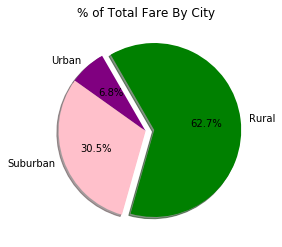

In [203]:
# Calculate Type Percents
total_fares = city_ride_data["fare"].sum()
types = city_ride_data.groupby("type").sum()
types["percents"] = types["fare"]/total_fares*100

#Prework for pie chart
labels = ["Urban","Suburban","Rural"]
percents = types["percents"]
colors = ["Purple","Pink","Green"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(percents, labels=labels, colors=colors, 
         explode = explode,autopct = "%1.1f%%", shadow=True, startangle=120);
# axis equal so we have a perfect circle
plt.axis("off");
plt.title("% of Total Fare By City");

# Save Figure
plt.savefig("FaresPercent.png")

## Total Rides by City Type

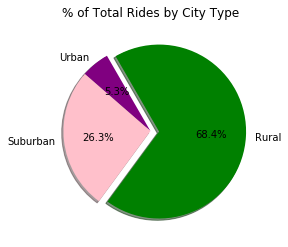

In [201]:
# Calculate Ride Percents
total_ride = city_ride_data["ride_id"].count()
ride_types = city_ride_data.groupby("type").count()
ride_types["percents"] = ride_types["ride_id"]/total_ride*100

#Prework for pie chart
labels = ["Urban","Suburban","Rural"]
percents = ride_types["percents"]
colors = ["Purple","Pink","Green"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(percents, labels=labels, colors=colors, 
         explode = explode,autopct = "%1.1f%%", shadow=True, startangle=120);
# axis equal so we have a perfect circle
plt.axis("off");
plt.title("% of Total Rides by City Type");

# Save Figure
plt.savefig("RidePercent.png")


## Total Drivers by City Type

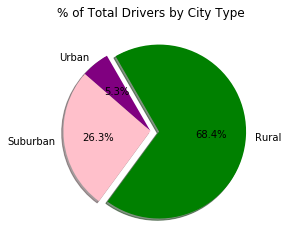

In [204]:
# Calculate Driver Percents
total_drivers = city_ride_data["driver_count"].count()
driver_types = city_ride_data.groupby("type").count()
driver_types["percents"] = driver_types["driver_count"]/total_drivers*100

#Prework for pie chart
labels = ["Urban","Suburban","Rural"]
percents = driver_types["percents"]
colors = ["Purple","Pink","Green"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(percents, labels=labels, colors=colors, 
         explode = explode,autopct = "%1.1f%%", shadow=True, startangle=120);
# axis equal so we have a perfect circle
plt.axis("off");
plt.title("% of Total Drivers by City Type");

# Save Figure
plt.savefig("DriversPercent.png")